## Initial comparison for the machine learning models to be used for the Student Sleep Quality dataset

In [8]:
import pandas as pd

from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file into a DataFrame
data = pd.read_csv('../../data/sleep_patterns/V6_student_sleep_patterns.csv')

# Display basic information about the DataFrame
data.info()

# Display summary statistics for numerical columns
data.describe()

# Display the number of missing values in each column
data.isnull().sum()

# Display the unique values in each column
for column in data.columns:
    print(f"{column}: {data[column].unique()}")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Student_ID         500 non-null    int64  
 1   Age                500 non-null    int64  
 2   Gender             500 non-null    object 
 3   University_Year    500 non-null    object 
 4   Sleep_Duration     500 non-null    float64
 5   Study_Hours        500 non-null    float64
 6   Screen_Time        500 non-null    float64
 7   Caffeine_Intake    500 non-null    int64  
 8   Physical_Activity  500 non-null    float64
 9   Sleep_Quality      500 non-null    int64  
dtypes: float64(4), int64(4), object(2)
memory usage: 39.2+ KB
Student_ID: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60 

### Testing possible models:

In [9]:
# Drop rows with missing values
data = data.dropna()

# Drop the features that are to be ignored
data = data.drop(['Student_ID'], axis=1)

# Encode categorical variables (if any)
data['Gender'] = data['Gender'].astype('category').cat.codes
data['University_Year'] = data['University_Year'].astype('category').cat.codes

# Separate the features and the target variable
features = data.drop(['Sleep_Quality'], axis=1)
targets = data['Sleep_Quality']

# Split the data into training and testing sets
features_train, features_test, targets_train, targets_test = train_test_split(features, targets, test_size=0.2, random_state=42)

# Initialize the LazyClassifier with default hyperparameters
lazyClassifier = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)

# Fit the LazyClassifier on the training data and get the models and predictions
models, predictions = lazyClassifier.fit(features_train, features_test, targets_train, targets_test)
models


  0%|          | 0/32 [00:00<?, ?it/s]

 78%|███████▊  | 25/32 [00:01<00:00, 21.11it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000069 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 276
[LightGBM] [Info] Number of data points in the train set: 400, number of used features: 8
[LightGBM] [Info] Start training from score -3.912023
[LightGBM] [Info] Start training from score -4.382027
[LightGBM] [Info] Start training from score -3.593569
[LightGBM] [Info] Start training from score -3.047026
[LightGBM] [Info] Start training from score -3.158251
[LightGBM] [Info] Start training from score -2.557477
[LightGBM] [Info] Start training from score -2.494957
[LightGBM] [Info] Start training from score -2.230264
[LightGBM] [Info] Start training from score -2.207275
[LightGBM] [Info] Start training from score -2.436116
[LightGBM] [Info] Start training from score -2.494957
[LightGBM] [Info] Start training from score -2.059639
[LightGBM] [Info] Start training from score -2.590267
[LightGBM] [I

100%|██████████| 32/32 [00:02<00:00, 14.19it/s]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

100%|██████████| 32/32 [00:02<00:00, 15.51it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
GaussianNB,0.11,0.12,None,0.07,0.02
ExtraTreeClassifier,0.16,0.11,None,0.16,0.01
LGBMClassifier,0.12,0.10,None,0.11,0.62
BernoulliNB,0.17,0.09,None,0.12,0.02
BaggingClassifier,0.13,0.09,None,0.12,0.06
PassiveAggressiveClassifier,0.14,0.09,None,0.09,0.04
DecisionTreeClassifier,0.11,0.09,None,0.11,0.02
RandomForestClassifier,0.10,0.08,None,0.10,0.24
CalibratedClassifierCV,0.14,0.08,None,0.08,0.31


### Ranking of possible models to use:

In [10]:
ranked_models = models.sort_values(by='Accuracy', ascending=False)
ranked_models


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
BernoulliNB,0.17,0.09,None,0.12,0.02
ExtraTreeClassifier,0.16,0.11,None,0.16,0.01
CalibratedClassifierCV,0.14,0.08,None,0.08,0.31
PassiveAggressiveClassifier,0.14,0.09,None,0.09,0.04
BaggingClassifier,0.13,0.09,None,0.12,0.06
LGBMClassifier,0.12,0.10,None,0.11,0.62
RidgeClassifierCV,0.12,0.07,None,0.06,0.02
ExtraTreesClassifier,0.12,0.08,None,0.11,0.21
KNeighborsClassifier,0.12,0.08,None,0.12,0.02


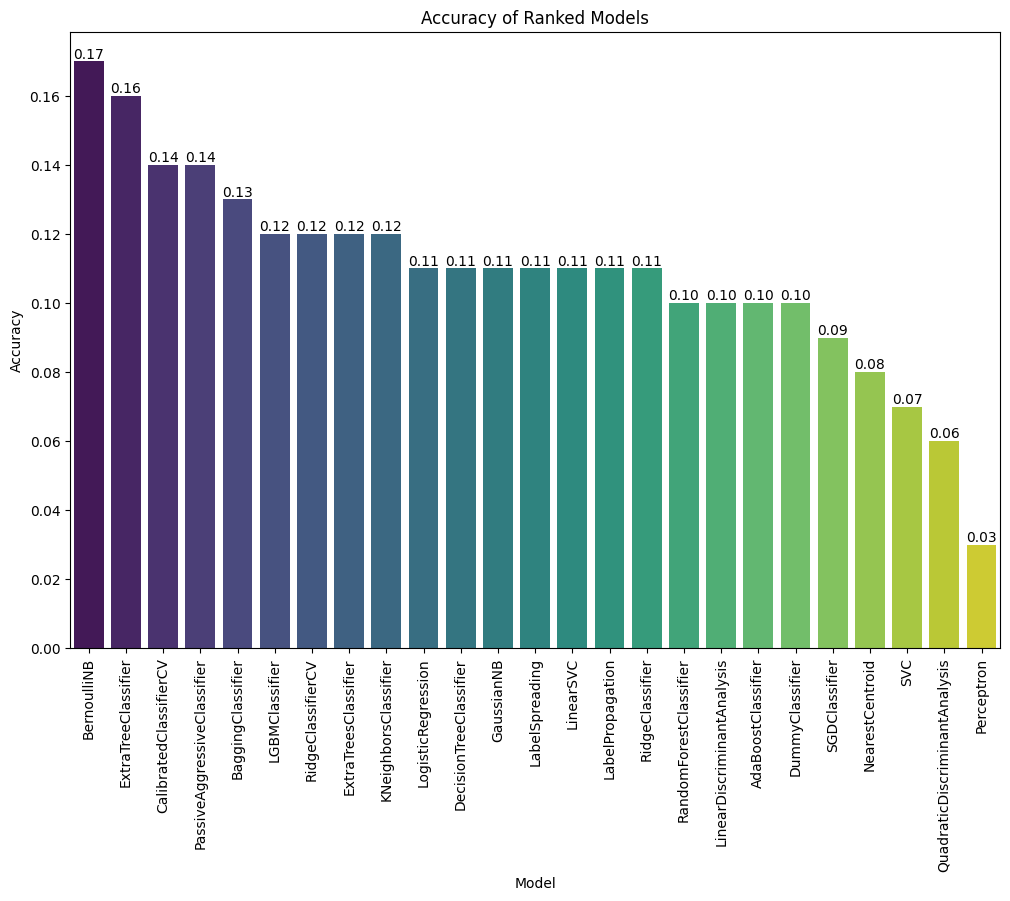

In [11]:
plt.figure(figsize=(12, 8))
sns.barplot(x=ranked_models.index, y='Accuracy', data=ranked_models, palette='viridis')
plt.xticks(rotation=90)
plt.title('Accuracy of Ranked Models')
plt.xlabel('Model')
for index, value in enumerate(ranked_models['Accuracy']):
    plt.text(index, value, f'{value:.2f}', ha='center', va='bottom')
plt.ylabel('Accuracy')
plt.show()

### Ranking of Selected Models:
- K Nearest Neighbor Classifier
- Decision Tree Classifier
- Logistic Regression

In [12]:
selected_models = ranked_models.loc[['KNeighborsClassifier', 'DecisionTreeClassifier', 'LogisticRegression']]
selected_models

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
KNeighborsClassifier,0.12,0.08,None,0.12,0.02
DecisionTreeClassifier,0.11,0.09,None,0.11,0.02
LogisticRegression,0.11,0.07,None,0.07,0.03


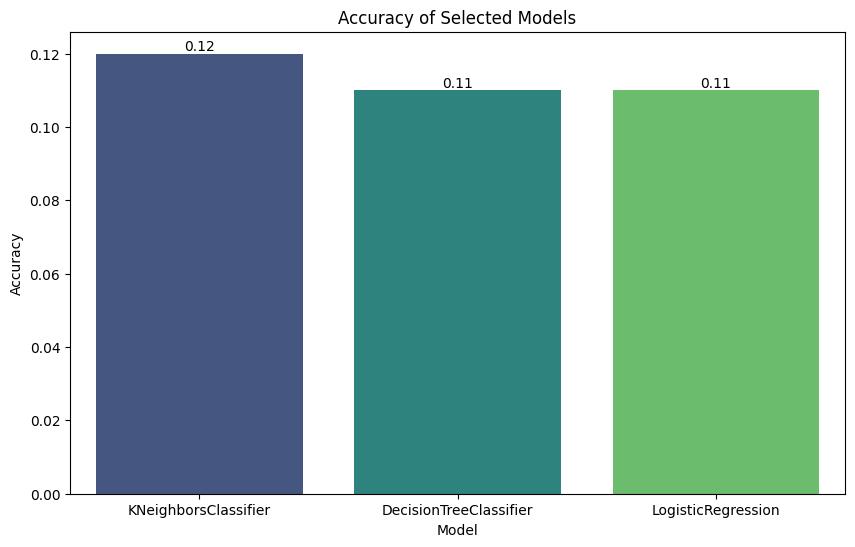

In [13]:
plt.figure(figsize=(10, 6))
sns.barplot(x=selected_models.index, y='Accuracy', data=selected_models, palette='viridis')
plt.title('Accuracy of Selected Models')
plt.xlabel('Model')
plt.ylabel('Accuracy')
for index, value in enumerate(selected_models['Accuracy']):
    plt.text(index, value, f'{value:.2f}', ha='center', va='bottom')
plt.show()